In [37]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv",sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df = df.drop("Surname", axis=1)

In [41]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
import numpy as np # For data manipulation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # K neighbors classification model
from sklearn.naive_bayes import GaussianNB # Gaussian Naive bayes classification model
from sklearn.metrics import accuracy_score # For checking the accuracy of the model

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Geography'])
df['Geography'] = le.transform(df['Geography'])
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

In [43]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df = df.drop(["RowNumber", "CustomerId"], axis=1)

In [45]:
data = df.drop("Exited", axis=1)
target = df["Exited"]

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 17)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(7000, 10)
(3000, 10)
7000
3000


In [51]:
from sklearn import metrics
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
nb_y_pred = nbModel.predict(X_test)
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[2301,   86],
       [ 578,   35]], dtype=int64)

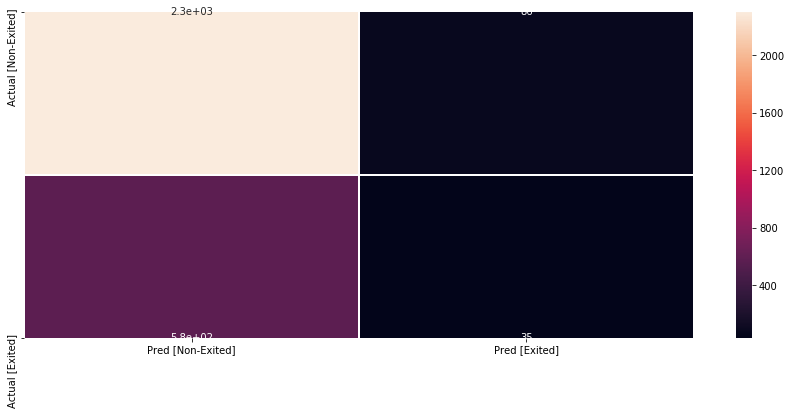

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
ylabel = ["Actual [Non-Exited]","Actual [Exited]"]
xlabel = ["Pred [Non-Exited]","Pred [Exited]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [57]:
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  77.86666666666666 %


In [60]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2387
           1       0.29      0.06      0.10       613

    accuracy                           0.78      3000
   macro avg       0.54      0.51      0.48      3000
weighted avg       0.70      0.78      0.71      3000



In [61]:
nb_TP = nbConfusion[1, 1]
nb_TN = nbConfusion[0, 0]
nb_FP = nbConfusion[0, 1]
nb_FN = nbConfusion[1, 0]

nb_Precision = nb_TP / ( nb_TP + nb_FP)
print ('Precision: ', nb_Precision)

nb_Recall = nb_TP / ( nb_TP + nb_FN )
print ('Recall: ', nb_Recall)

metrics.f1_score(y_test, nb_y_pred)

Precision:  0.2892561983471074
Recall:  0.057096247960848286


0.09536784741144413